## Task 4.1: Supervised ML - Regression

**Author**: Andre Schomakers

**Date**: 04 Mar 2025

This interactive Python notebook `.ipynb` is used for supervised regression for task 4.1.


**Sources**: [Bevans R (2025): Linear Regression in R | A Step-by-Step Guide and Examples](https://www.scribbr.com/statistics/linear-regression-in-r/)


### Imports and some basic processing

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load the dataset to workspace
df = pd.read_csv("heartdata.csv")
df
    # (498, 4)
    # "Unnamed: 0" is an additional idx-col and can be deleted

,Unnamed: 0,biking,smoking,heartdisease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [4]:
df.isna().sum() # no missing values

biking          0
smoking         0
heartdisease    0
dtype: int64

In [5]:
df

,biking,smoking,heartdisease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
493,47.660440,27.562464,11.294392
494,45.097203,21.385620,9.616762
495,8.279743,6.423720,13.495168
496,42.345863,20.741328,10.115865


### Assumptions

We can see, the variables `biking` and `smoking` are independent variables $X$, `heartdisease` $y$.

Next, we will check assumptions by _Bevans_ article (referred above):
- simple regression (one independent variable):
    - observations are independent (no autocorrelation). Reminder: autocorrelation exists, if e.g. the same test patient has multiple measurements in the dataset
    - dependent variable $y$ is normally distributed
    - relationsship between $X$ and $y$ is linear (check by scatter plot)
    - Homoscedasticity (pred error doesnt change significantly over range of prediction of the model)

- multiple regression ($>\,1$ independent variables)
    - same as above and **additionally**
    - independence between $X$: check if `biking`and `smoking` are independent from each other
    - linearity: check both variables against $y$
    

In [6]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)
# reminder: correlation ranges [-1, 1]. 
# biking seems to have a strong negative relationsship with heartdisease: the more you bike, less likely you will develop a heart disease
# smoking doesnt seem to have a linear relationship (r = 0) 


Correlation Matrix:
                biking   smoking  heartdisease
biking        1.000000  0.015136     -0.935455
smoking       0.015136  1.000000      0.309131
heartdisease -0.935455  0.309131      1.000000


In [7]:
print(df.describe())
# median and avg are both at 10 for heartdisease

           biking     smoking  heartdisease
count  498.000000  498.000000    498.000000
mean    37.788411   15.435034     10.174538
std     21.481519    8.289959      4.571874
min      1.119154    0.525850      0.551898
25%     20.204598    8.279776      6.513683
50%     35.824459   15.814614     10.385255
75%     57.852786   22.568925     13.724024
max     74.907111   29.946743     20.453496


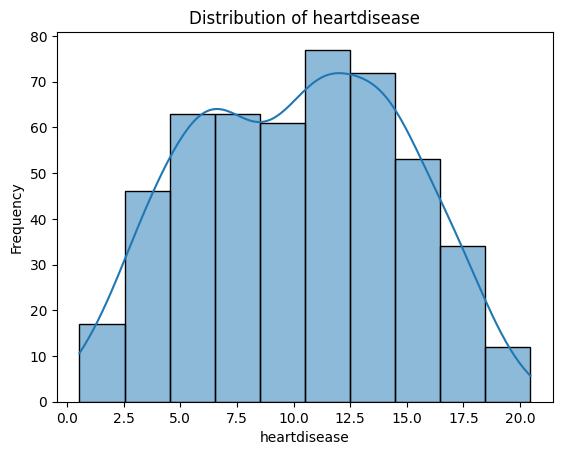

In [ ]:
sns.histplot(df['heartdisease'], kde=True, bins=10) # i didnt check for optimal bin size ...
plt.title('Distribution of heartdisease')
plt.xlabel('heartdisease')
plt.ylabel('Frequency')
plt.show()

# we can see the distribution of heartdisease is not exactly normally distributed (bimodal with two peaks at 6 and 12.5) but we will say it's rougly normally distributed

In [11]:
features = df.columns.tolist()
target = 'heartdisease'  # Assuming this is our target
features.remove(target)

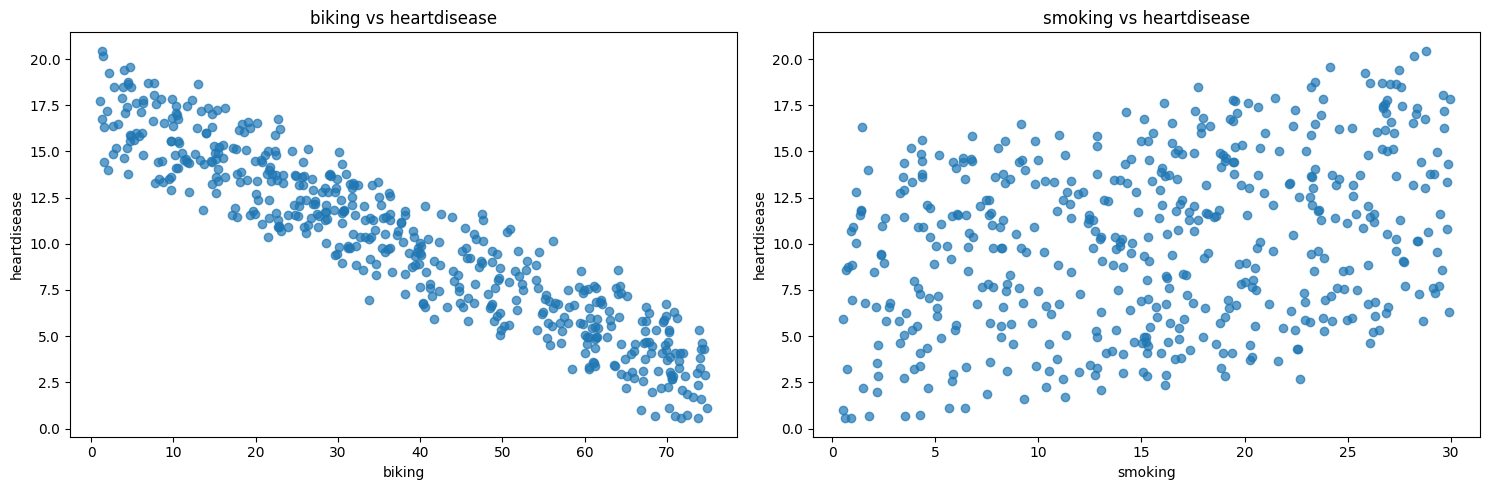

In [12]:
# Scatter plots with the target
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[feature], df[target], alpha=0.7)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()

As expected from correlation matrix, we can see our strong negative linear relationsship between biking on heart disease and our weak positive linear relationsship between smoking and heartdisease. For multiple regression a scatterplot between both independent vars is necessary


Text(0.5, 1.0, 'Relationship Between Biking and Smoking')

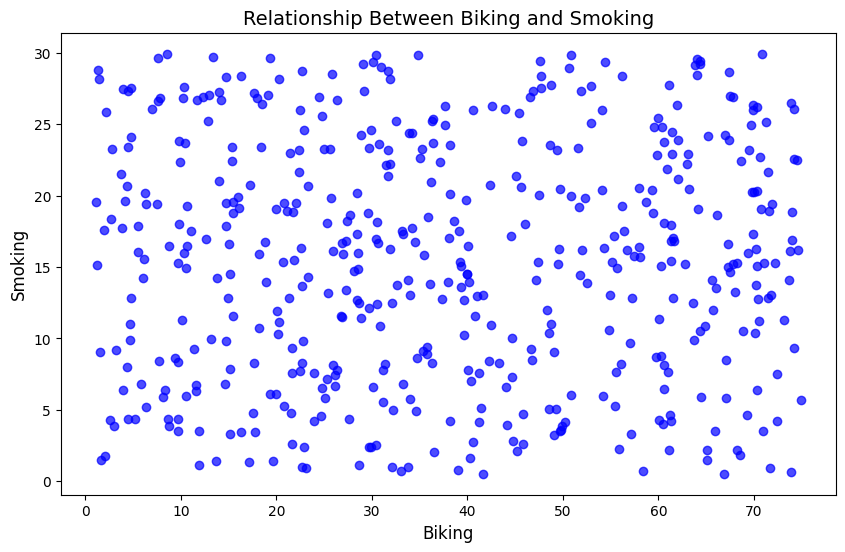

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['biking'], df['smoking'], alpha=0.7, color='blue')


# Add labels and title
plt.xlabel('Biking', fontsize=12)
plt.ylabel('Smoking', fontsize=12)
plt.title('Relationship Between Biking and Smoking', fontsize=14)

# we can see no linear relationship between our independent variables

### Modelling (evaluating on y_train was skipped)

From a best-practice point of view, I skipped on fitting the whole $X$ and instead did directly turned towards train-test

In [ ]:
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20%

In [16]:
# calling the OLS-Regressor
model_cv = LinearRegression()
model_cv.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_pred = model_cv.predict(X_test)


# evaluation with R² and RSME
r2_test = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# really good score, R² ranges from [0,1] where 1 means a perfectly fitted model meaning our regression line is placed into the scatterplot 
# such that datapoints are minimally close to the regression line

print(f"R² Score on test data: {r2_test:.4f}")
print(f"RMSE on test data: {rmse:.4f}")
# RSME takes the unit of the dependent variable, so we could add (probably) % here. As no detailed data dict was delivered, this is assumed.

R² Score on test data: 0.9751
RMSE on test data: 0.6725


Text(0.5, 1.0, 'Residual Plot')

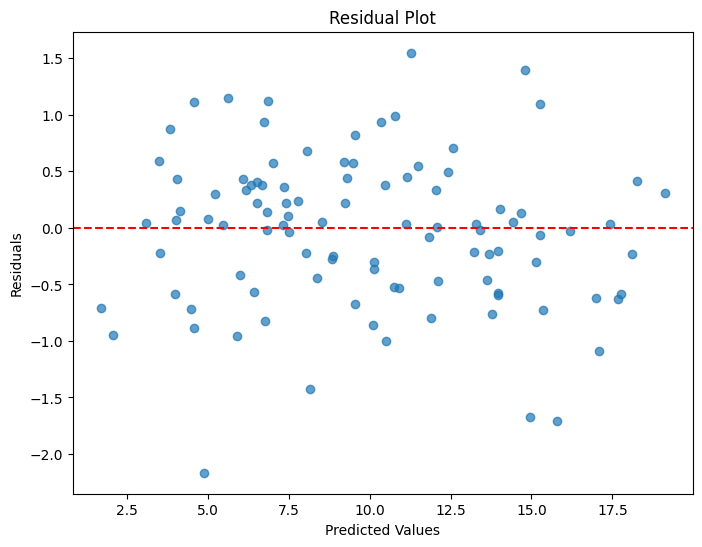

In [ ]:
# checking residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# the residuals are more less around 0 without a strict pattern. The more the values shift, the less good the predictions are
# note the scale of the residuals, an intervall between ~[-2, 1.5] is not too much and therefore good
# homoscadasticy assumption checked

Text(0.5, 1.0, 'Residual Distribution')

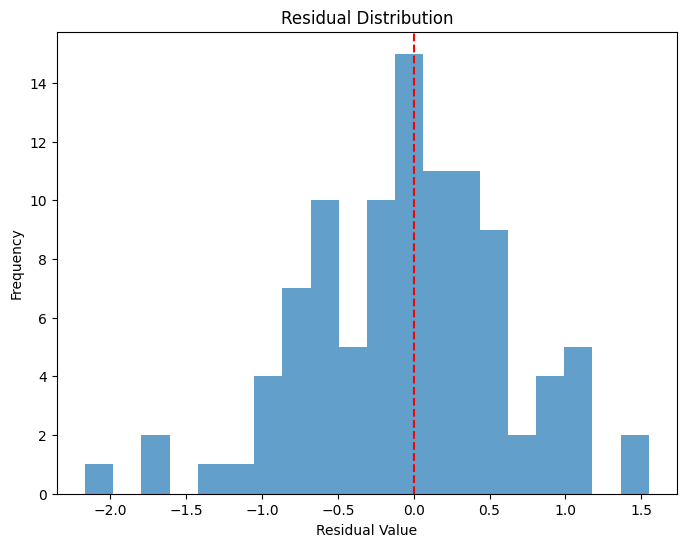

In [20]:
# hist of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

# the residuals are "normally" distributed, so the homoscadasticy assumption is fulfilled